# EDA of Automobile Data
## This dataset provides information about the cars of different car making compny's with their features like make, fuel-type, price, body-style, engine size, horsepower etc.

### Problem Statement :
 - Predict the prices of cars based on different features of car.
 - Find out the highest sell of car based on the make and other features


In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
import pandas_profiling
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [2]:
### Load csv of Automobile data 
df_auto = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/Automobile_data.csv')
df_auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


### Pandas Pre-Profiling

In [3]:
#profile = df_auto.profile_report(title = "Automobile data before profiling")
#profile.to_file(output_file = "AutomobilePreProfiling.html")

### Below function describes the data with mean, standard deviation, quartile values, and min, max values.

In [4]:
#df_auto.describe(include='all')
df_auto.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [5]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [7]:
df_auto['engine-type'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

### Below code replaces the blank(?) values with the mean values

In [8]:
# Setting the missing value to mean of normalized losses and convert the datatype to integer
nloss = df_auto['normalized-losses'].loc[df_auto['normalized-losses']!='?']
nlossmean = nloss.astype(str).astype(int).mean()
print(nlossmean)
df_auto['normalized-losses'] = df_auto['normalized-losses'].replace('?',nlossmean).astype(int)

122.0


In [9]:
#Setting the missing value to mean of price and convert the datatype to integer
price = df_auto['price'].loc[df_auto['price']!='?']
pricemean = price.astype(str).astype(int).mean()
print(pricemean)
df_auto['price']=df_auto['price'].replace('?',pricemean).astype(int)
#price.unique()

13207.129353233831


In [10]:
#Setting the missing value to mean of horsepower and convert the datatype to integer
hp = df_auto['horsepower'].loc[df_auto['horsepower']!='?']
hpmean = hp.astype(str).astype(int).mean()
df_auto['horsepower'] = df_auto['horsepower'].replace('?',hpmean).astype(int)
print(hpmean)
df_auto['horsepower'].unique()

104.25615763546799


array([111, 154, 102, 115, 110, 140, 160, 101, 121, 182,  48,  70,  68,
        88, 145,  58,  76,  60,  86, 100,  78,  90, 176, 262, 135,  84,
        64, 120,  72, 123, 155, 184, 175, 116,  69,  55,  97, 152, 200,
        95, 142, 143, 207, 288, 104,  73,  82,  94,  62,  56, 112,  92,
       161, 156,  52,  85, 114, 162, 134, 106])

### Below code is to remove the blank (?) values of Num-of-doors from the dataset. but as there are only two blank entries, We are removing the blank num-of-doors.

In [11]:
df_auto['num-of-doors'].value_counts()

four    114
two      89
?         2
Name: num-of-doors, dtype: int64

In [12]:
df_auto['num-of-doors'].loc[df_auto['num-of-doors']=='?']
df_auto = df_auto[df_auto['num-of-doors']!='?']
df_auto['num-of-doors'].loc[df_auto['num-of-doors']=='?']

df_auto['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [13]:
rpm = df_auto['peak-rpm'].loc[df_auto['peak-rpm']!='?']
rpmmean = rpm.astype(str).astype(int).mean()
df_auto['peak-rpm'] = df_auto['peak-rpm'].replace('?',rpmmean).astype(int)

#df_auto['peak-rpm'].unique()

### Below code adds new column CH-mpg to the dataset which shows the milage of car in City and Highway

In [14]:
df_auto['CH-mpg'] = df_auto[['city-mpg','highway-mpg']].mean(axis = 1)
df_auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,CH-mpg
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,24.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,24.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,22.5
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.4,10.0,102,5500,24,30,13950,27.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.4,8.0,115,5500,18,22,17450,20.0


In [15]:
df_auto.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
CH-mpg               0
dtype: int64

###  Grouping the dataset by fuel-type, make and Drive-wheels features.

In [16]:
df_auto.groupby(['fuel-type','make','drive-wheels']).mean()

symboling  normalized-losses  \
fuel-type make          drive-wheels                                 
diesel    mazda         rwd            0.000000         122.000000   
          mercedes-benz rwd           -0.750000          93.000000   
          nissan        fwd            1.000000         128.000000   
          peugot        rwd            0.000000         145.400000   
          toyota        fwd           -0.333333          82.333333   
          volkswagen    fwd            1.500000         108.000000   
          volvo         rwd           -1.000000          95.000000   
gas       alfa-romero   rwd            2.333333         122.000000   
          audi          4wd            1.000000         143.000000   
                        fwd            1.400000         144.800000   
          bmw           rwd            0.375000         156.000000   
          chevrolet     fwd            1.000000         100.000000   
          dodge         fwd            1.000000         131.625000   
          honda         fwd            0.615385         103.000000   
          isuzu         fwd            0.500000         122.000000   
                        rwd            1.000000         122.000000   
          jaguar        rwd            0.000000         129.666667   
          mazda         fwd            0.700000         114.100000   
                        rwd            2.400000         143.600000   
          mercedes-benz rwd            0.750000         127.000000   
          mercury       rwd            1.000000         122.000000   
          mitsubishi    fwd            1.846154         140.615385   
          nissan        fwd            0.714286         120.428571   
                        rwd            2.333333         206.333333   
          peugot        rwd            0.000000         148.000000   
          plymouth      fwd            0.666667         129.000000   
                        rwd            3.000000         122.000000   
          porsche       rwd            2.600000         134.800000   
          renault       fwd            1.000000         122.000000   
          saab          fwd            2.500000         127.000000   
          subaru        4wd            0.400000          91.400000   
                        fwd            0.571429          92.857143   
          toyota        4wd            0.000000          86.000000   
                        fwd           -0.076923          80.000000   
                        rwd            1.428571         148.714286   
          volkswagen    fwd            1.750000         128.250000   
          volvo         rwd           -1.300000          91.100000   

                                      wheel-base      length      width  \
fuel-type make          drive-wheels                                      
diesel    mazda         rwd           104.900000  175.000000  66.100000   
          mercedes-benz rwd           110.575000  192.975000  70.650000   
          nissan        fwd            94.500000  165.300000  63.800000   
          peugot        rwd           110.420000  191.580000  68.400000   
          toyota        fwd            97.933333  169.400000  65.100000   
          volkswagen    fwd            98.075000  173.825000  65.850000   
          volvo         rwd           109.100000  188.800000  68.900000   
gas       alfa-romero   rwd            90.566667  169.600000  64.566667   
          audi          4wd            99.450000  177.400000  67.150000   
                        fwd           103.400000  186.400000  69.340000   
          bmw           rwd           103.162500  184.500000  66.475000   
          chevrolet     fwd            92.466667  151.933333  62.500000   
          dodge         fwd            95.175000  161.450000  64.212500   
          honda         fwd            94.330769  160.769231  64.384615   
          isuzu         fwd            94.500000  155.900000  63.600000   
                        rwd     

In [17]:
df_auto.make.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

### Below bar chart shows the number of verhicles based on their make.
### Using this graph we can see that :
#### -The Toyota make has the highest number of cars
#### - The Toyota make vehicles count is near about double of second highest make Nissan

Text(0.5, 1.0, 'Automobile make - Bar Chart')

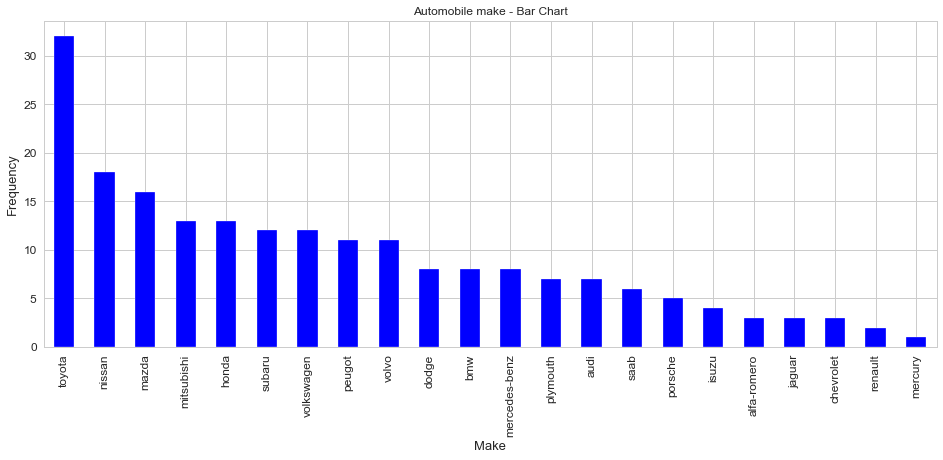

In [19]:
df_auto['make'].value_counts().plot(kind='bar',figsize=(16,6),colormap='winter',fontsize=12)

plt.xlabel('Make',fontsize = 13)
plt.ylabel('Frequency',fontsize = 13)
plt.title("Automobile make - Bar Chart", fontsize = 12)

## Below pie chart shows the percentage of vehicles available in data with respect to their makes.
#### -Toyota make vehicles are 15.61% which is highest, Nissan has 8.78% in the total, which is second highest.
#### - Mercury make vehicles percentage is very less, i.e only 0.49%

Text(0.5, 1.0, 'Automobile make Percecntile chart - Pie-chart')

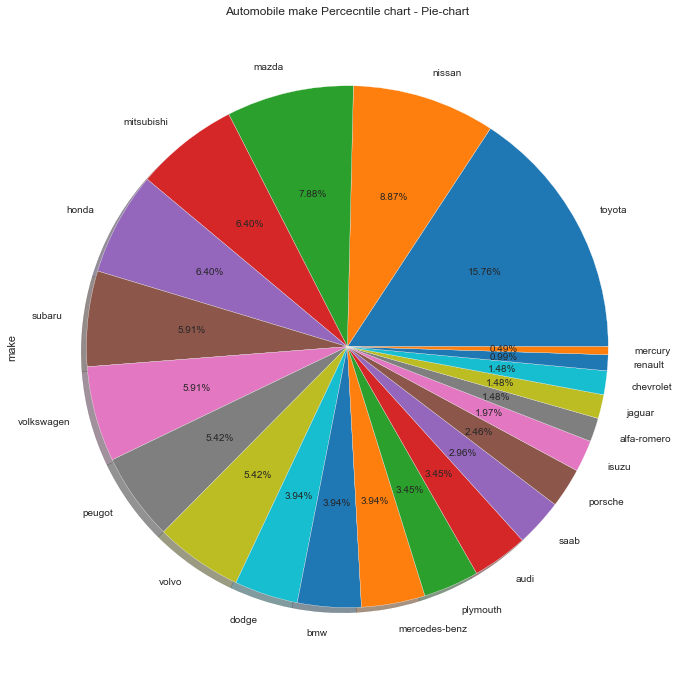

In [26]:
df_auto['make'].value_counts().plot(kind='pie',figsize=(15,12), legend=False,fontsize=10,autopct='%.2f%%', shadow = True)
#explode = (0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
plt.title("Automobile make Percecntile chart - Pie-chart")

### Below pie chart shows the total percentage of vehicles with respect to their body style i.e. Sedan, hatchback, wagon, hardtop and convertible.
#### -Sedan vehicles has the more count (46.83%) campared to other body-style vehicles.
#### -Convertible vehicles are very less in number (at the bottom) which is 2.93% just below the hardtop which is 3.90%.

Text(0.5, 1.0, 'Body-style with percentage - Pie-chart')

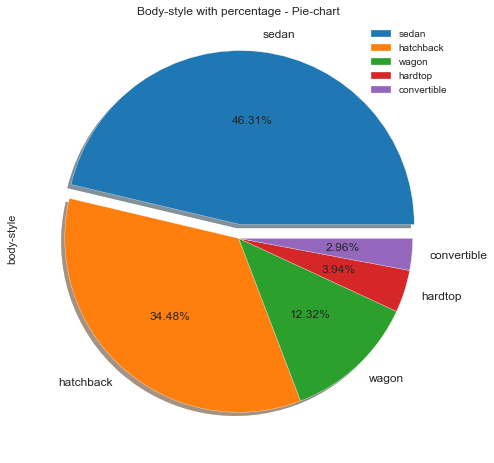

In [20]:
df_auto['body-style'].value_counts().plot(kind='pie',figsize=(8,8),fontsize=12,legend=True,autopct='%.2f%%',shadow =True, explode = (0.08,0,0,0,0))
plt.title('Body-style with percentage - Pie-chart')

### Below box plot is representing the distribution of price through the data quartiles (or percentiles) based on the body styles .
#### - Count plot shows the number of vehicles based on the body-style.
#### - Sedan vehicles are more popular than any other body-style vehicles.
#### - Box plot explains us that the vehicles with body-style 'hardtop' has the prices higher than the other body-style vehicles.
#### - Most of the Hatchback vehicles prices are less than the other body-style vehicles.

Text(0.5, 1.0, 'Price vs Body-style - Box plot')

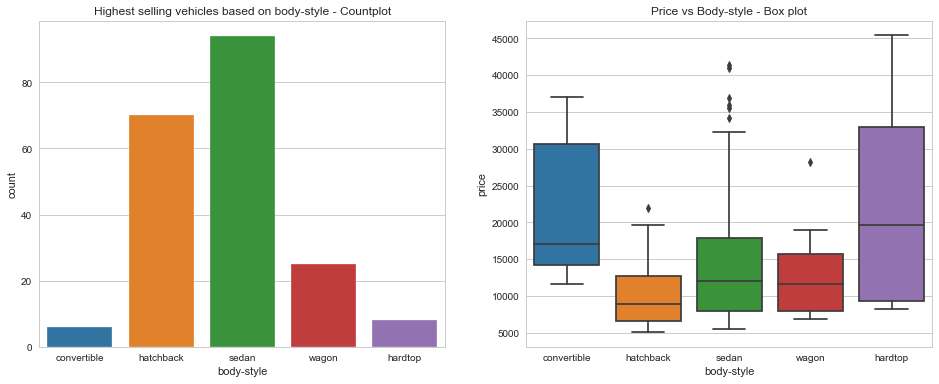

In [21]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sbn.countplot(x='body-style',data=df_auto)
plt.title('Highest selling vehicles based on body-style - Countplot')

plt.subplot(1,2,2)
sbn.boxplot(data=df_auto,x='body-style',y='price')
plt.title('Price vs Body-style - Box plot')

### Histogram to show the number of vehicles in particular price slab
#### - Most of the vehicles are in the price range of 5000 to 10000

Text(0.5, 1.0, 'Number of vehicles based on Price slab - Histogram')

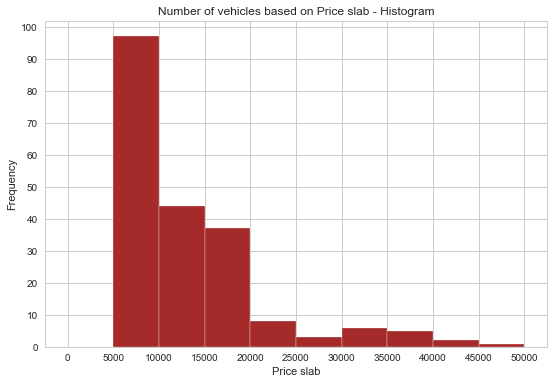

In [22]:
bins=[0,5000,10000,15000,20000,25000,30000,35000,40000,45000,50000]
df_auto['price'].plot(kind='hist',bins=bins,figsize=(9,6),color='brown',yticks=np.arange(0,110,10),xticks=bins)
plt.xlabel('Price slab')
plt.ylabel('Frequency')
plt.title('Number of vehicles based on Price slab - Histogram')

### The Below bar chart shows the count of Vehicles based on their body-style and the fuel-type.
### Box plot is representing the distribution of vehicle price data through the data quartiles (or percentiles) and average prices with respect to their fuel type.
#### - Most of the vehicles are with fuel-type as gas.
#### - Diesel vehicles are very less in number compared to gas vehicles in all the body-styles.
#### - Diesel vehicles have the more prices than the gas vehicles.

Text(0.5, 1.0, 'Representing the Price of vehicles according to its fuel-type - Box Plot')

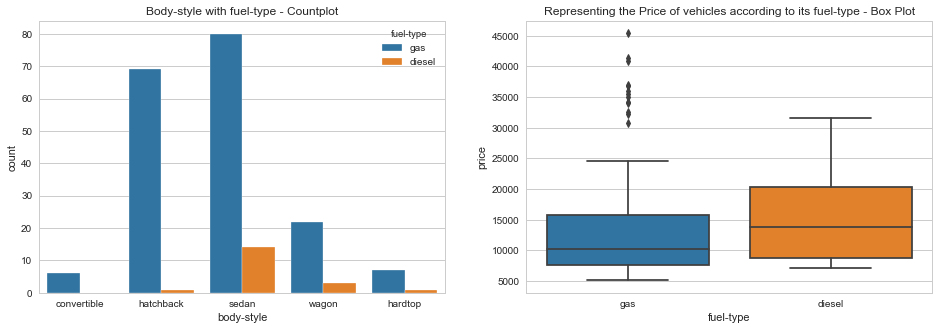

In [23]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sbn.countplot(x='body-style',hue='fuel-type',data=df_auto)
plt.title('Body-style with fuel-type - Countplot')

plt.subplot(1,2,2)
sbn.boxplot(data=df_auto,x='fuel-type',y='price')
plt.title('Representing the Price of vehicles according to its fuel-type - Box Plot')

### Below stacked graph represents the highway mileage vs the city mileage of all make vehicles.
#### - This graph shows the highway mileage of all the vehicles is more than the city mileage which is common in all vehicle make.

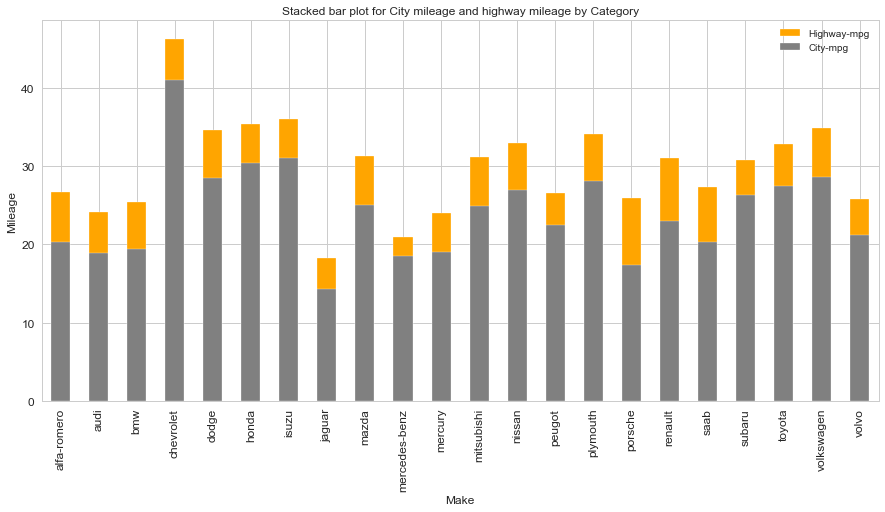

In [24]:
df_auto.groupby(['make'])['highway-mpg'].mean().plot(kind = 'bar',figsize=(15,7),color = 'orange', fontsize = 12)
df_auto.groupby(['make'])['city-mpg'].mean().plot(kind = 'bar',figsize=(15,7),color = 'grey', fontsize = 12)

plt.xlabel('Make', fontsize = 12)
plt.ylabel('Mileage', fontsize = 12)
plt.title('Stacked bar plot for City mileage and highway mileage by Category')
plt.legend(labels=('Highway-mpg','City-mpg'))

#### Line Chart - We can draw a line chart on continuous data only.

<AxesSubplot:>

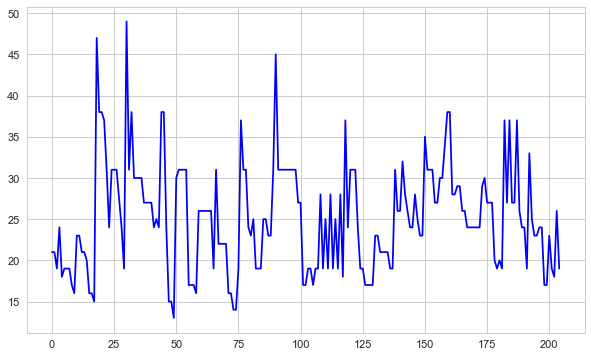

In [25]:
df_auto['city-mpg'].plot(kind='line',figsize=(10,6),colormap='winter',fontsize=11)

### Below Histogram and Line graph shows the distribution of mileage.
#### - Using below graphs we get information as most of the vehicles mileage is in the range of 20 to 35
#### - The data of mileage is positively/right skewed.

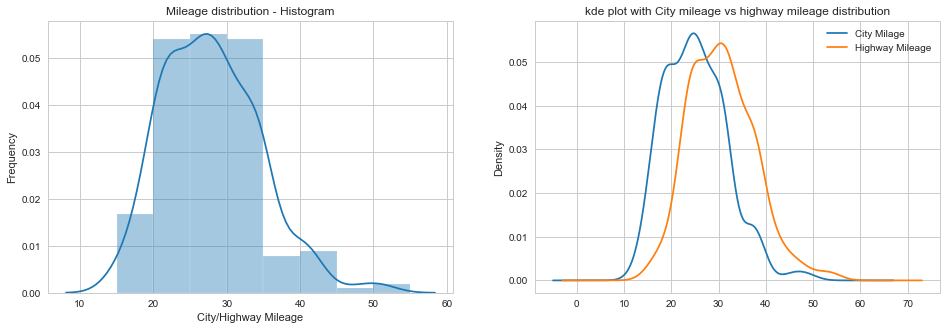

In [26]:
#to plot a histogram with the CH-milagee of a car. Distribution of bins is 10 each.
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
bins = np.arange(10,56,5)
#df_auto['CH-mpg'].plot(kind='hist',bins=bins,yticks=np.arange(5,60,5),xticks = bins)
sbn.distplot(df_auto['CH-mpg'],bins = bins)
plt.xlabel('City/Highway Mileage')
plt.ylabel('Frequency')
plt.title('Mileage distribution - Histogram')

plt.subplot(1,2,2)
df_auto['city-mpg'].plot(kind='kde')     #OR
df_auto['highway-mpg'].plot(kind='kde',title='kde plot with City mileage vs highway mileage distribution') 
#sbn.kdeplot(df_auto['city-mpg'],shade=True) #shaded kde plot
plt.legend(labels =('City Milage','Highway Mileage'))

### Below graph shows countplot for symboling of vehicles and box plot is for Symboling vs Price
#### - Most of the vehicles symboling value is 0 and 1.
#### - The vehicles with symboling/risk value 1 are the low priced vehicles.
#### - Vehicles with symboling/risk value -1 and -2 are the high priced vehicles.

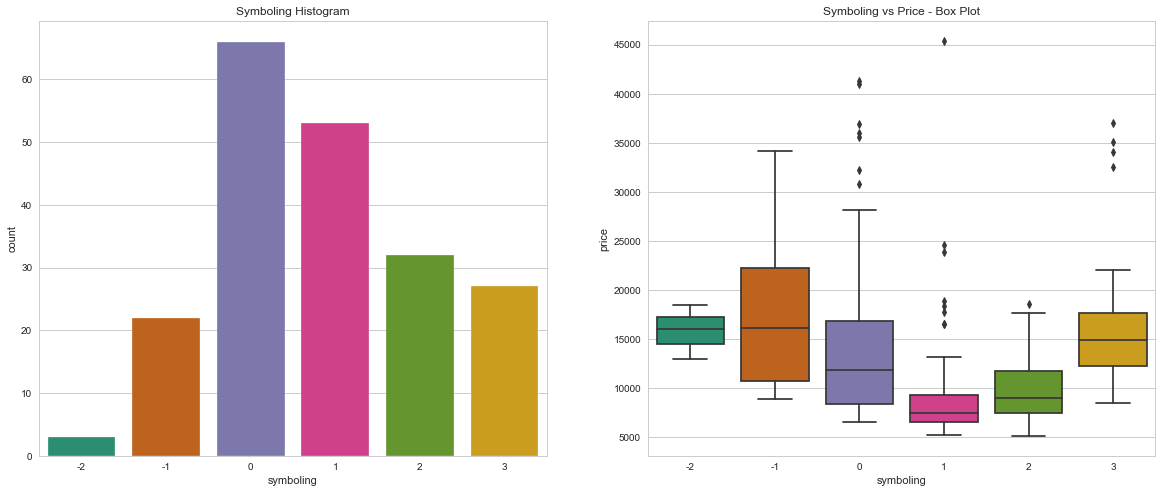

In [27]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sbn.countplot(df_auto.symboling, palette=("Dark2"))

plt.subplot(1,2,2)
plt.title('Symboling vs Price - Box Plot')
sbn.boxplot(data = df_auto, x='symboling', y='price', palette=("Dark2"))

plt.show()

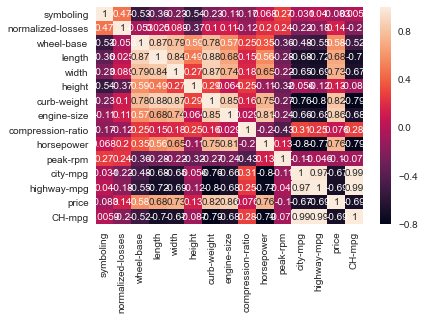

In [28]:
correlation_matrix = df_auto.corr()
sbn.heatmap(correlation_matrix, annot=True)
plt.show()

## Correlation between different featurs
### - Below Pairplot shows the correlation between different feature in automobile dataset. Correlation between the engine-size, horsepower, CH-mpg and price.

C:\Users\SHREE\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 0.98, 'Pair Plot to shows the correlation between different features in dataset')

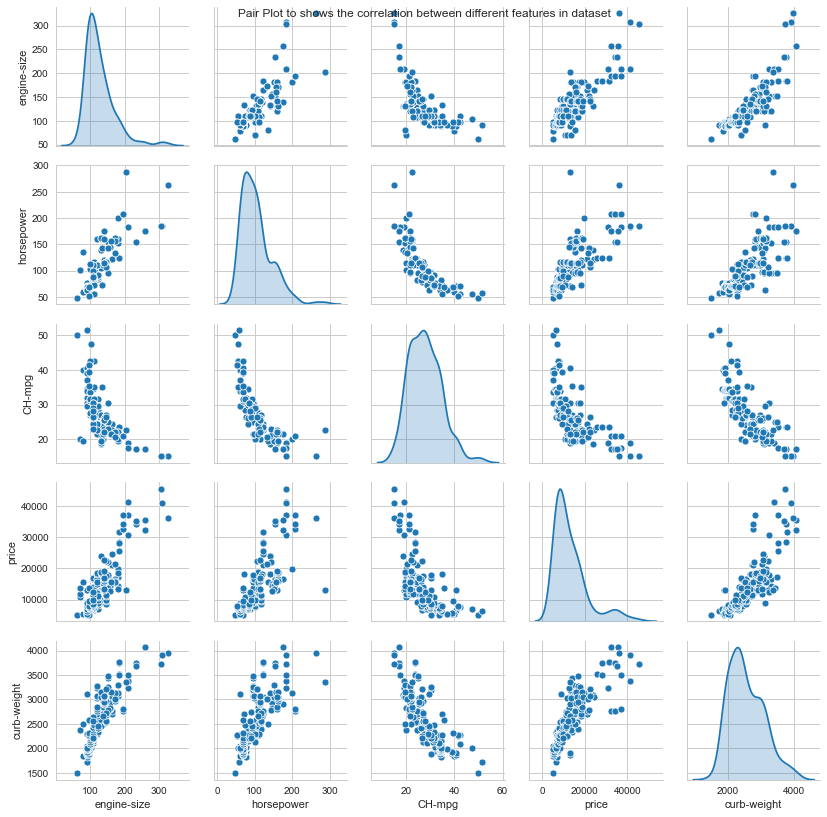

In [29]:
#Using seabourn's pairplot function to plot the pairplot for specific columns of the dataset
sbn.pairplot(data=df_auto[['engine-size','horsepower','CH-mpg','price','curb-weight']],size=2.3,diag_kind='kde')
plt.suptitle("Pair Plot to shows the correlation between different features in dataset")

### Scatter plot based on the price vs engine-size and Horsepower
#### - Using below 1st scatter plot we can see that as the Engine-size increases the price of vehicles goes increases.
#### - Similarly the Horspower of vehicles increases the price of cars goes increases.
#### - Engine size and horsepower are positively correlated with the price.

Text(0.5, 1.0, 'Horsepower vs Price - Scatter Plot')

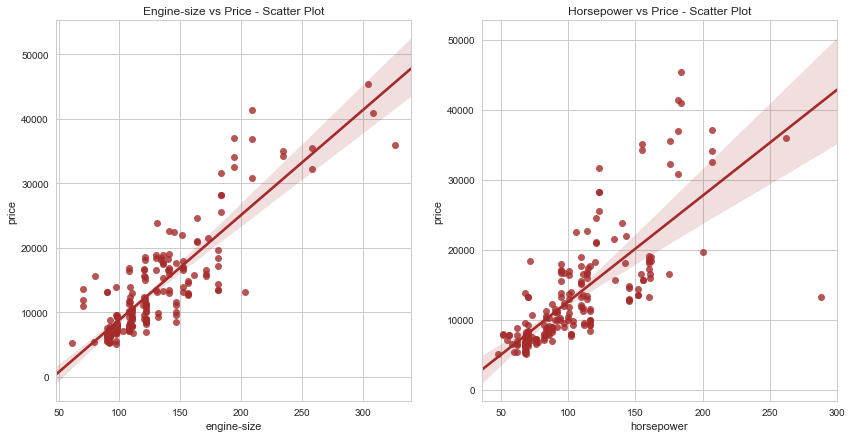

In [30]:
plt.figure(figsize=(14,7))

plt.subplot(1,2,1)
sbn.regplot(data=df_auto,x='engine-size',y='price',color='brown')
plt.title('Engine-size vs Price - Scatter Plot')

plt.subplot(1,2,2)
sbn.regplot(data=df_auto,x='horsepower',y='price',color='brown')
plt.title('Horsepower vs Price - Scatter Plot')

### Using below scatter plots we can see that the wheel-base and the curb-weight are the negatively correlated with  the City/highway mileage.
#### - As the wheel-base increases the mileage gets decreasing
#### - As the curb-weight increases the mileage gets decreasing

Text(0.5, 1.0, 'CH-mpg vs wheel-base - Scatter Plot')

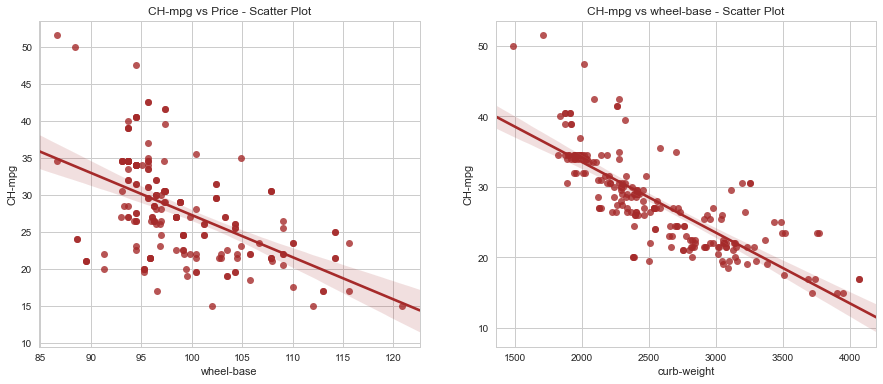

In [31]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sbn.regplot(data=df_auto,x='wheel-base',y='CH-mpg',color='brown')
plt.title('CH-mpg vs Price - Scatter Plot')

plt.subplot(1,2,2)
sbn.regplot(data=df_auto,x='curb-weight',y='CH-mpg',color='brown')
plt.title('CH-mpg vs wheel-base - Scatter Plot')

### Symboling vs Normalized-losses & CH-mpg vs horsepower
#### - The 1st scatter plot shows that the lower the symboling/risk value the normalized-losses are also low.
#### - The 2nd scatter plot shows that the negative correlation between the CH-mpg and horsepower, which means when more       
####    horsepower gives the less mileage.

Text(0.5, 1.0, 'City/highway mileage Vs horsepower - Scatter Plot')

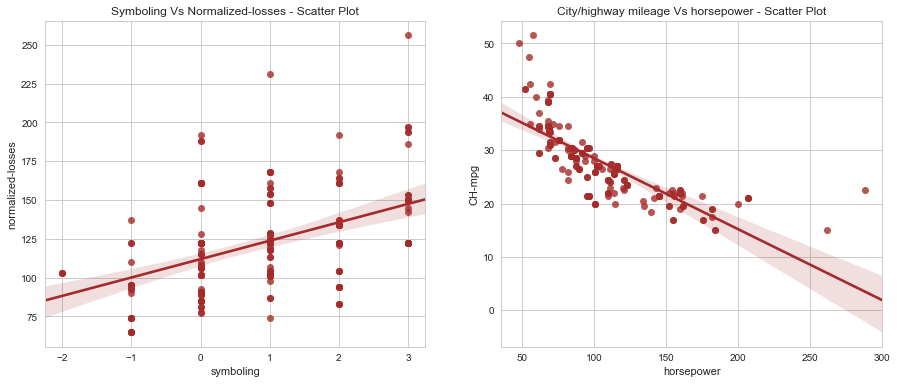

In [32]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sbn.regplot(data=df_auto,x='symboling',y='normalized-losses',color='brown')
plt.title('Symboling Vs Normalized-losses - Scatter Plot')

plt.subplot(1,2,2)
sbn.regplot(data=df_auto,x='horsepower',y='CH-mpg',color='brown')
plt.title('City/highway mileage Vs horsepower - Scatter Plot')

### Normalized-losses and symboling of vehicles
#### - Approximate 85 vehicles out of 205 are with symboling value 0
#### - The lowest normalized-losses are for the vehicles with symboling value -1, which is less than 100
#### - The vhicles with symboling/risk value 3 are having the large normalized-losses

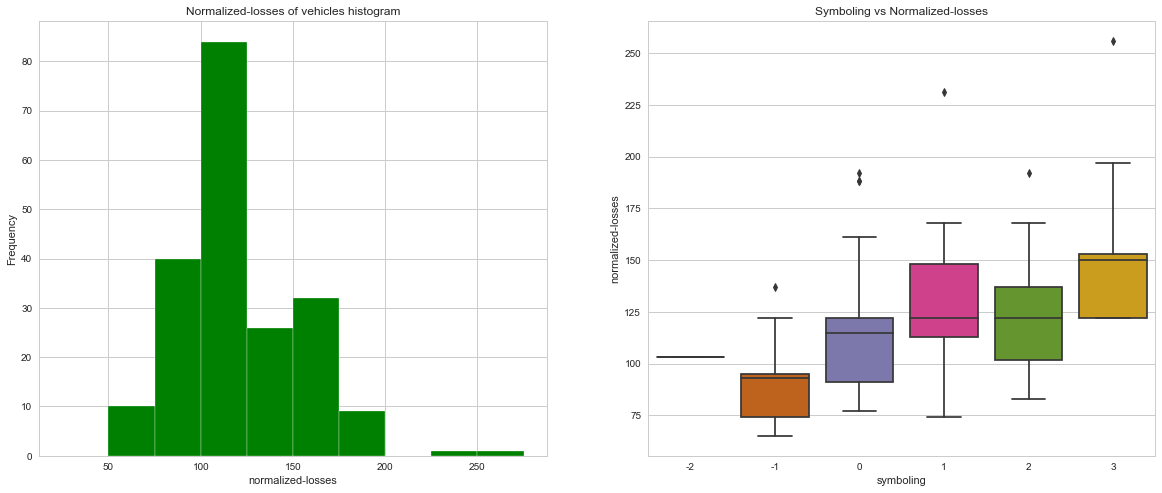

In [33]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
bins = np.arange(25,300,25)
df_auto['normalized-losses'].hist(bins = bins, color = 'green')
plt.xlabel('normalized-losses')
plt.ylabel('Frequency')
plt.title('Normalized-losses of vehicles histogram')

plt.subplot(1,2,2)
plt.title('Symboling vs Normalized-losses')
sbn.boxplot(data = df_auto, x='symboling', y='normalized-losses', palette=("Dark2"))

plt.show()

### Below box plot shows the vehicle make companies with their vehicle prices.
#### - Using below graph we get to know that the Jaguar, Mercedese-Benz and Porche are the Top 3 companies whose vehicles have the higher prices than other make vehicles.
#### - More than 50% vehicles of top 3 makes have the prices more than 30000.
#### - Also we get to know the companies (make) with the lowest prices vehicles are Chevrolet, dodge, plymouth.
#### - All the vehicles of toyota make have the prices below 12000 (approx).
#### - All Chevrolet make vehicles are very cheap in price, prices are below 8000.

Text(0.5, 1.0, 'Price of vehicles based on their make - Box Plot')

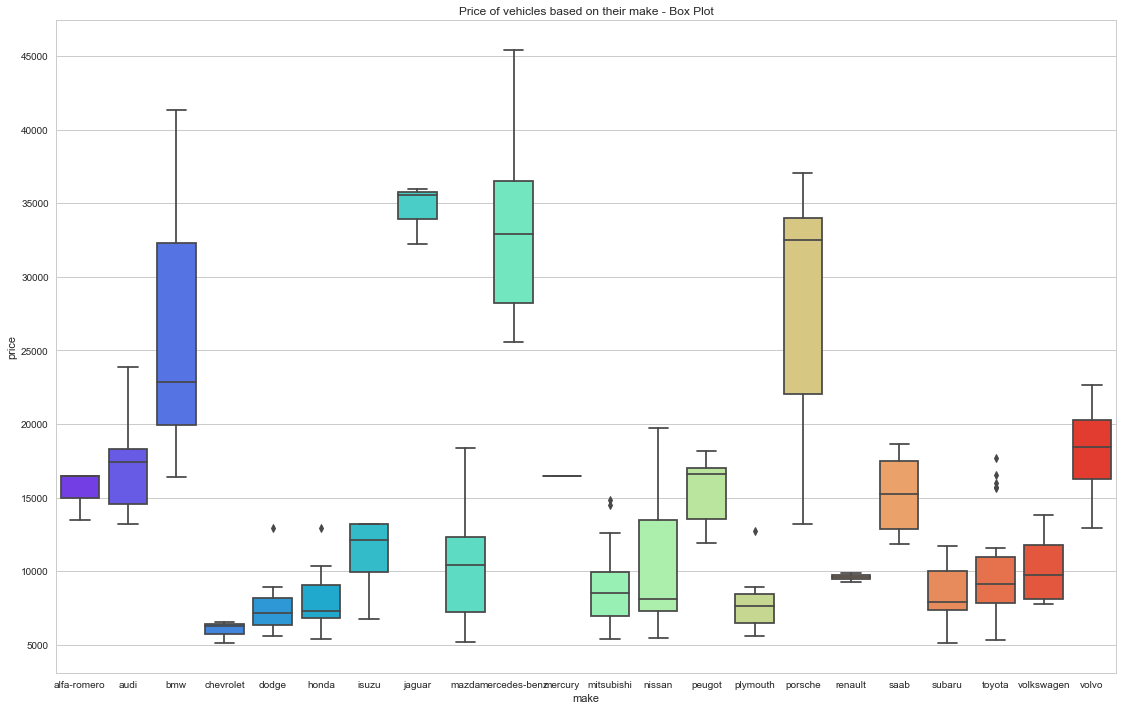

In [34]:
plt.figure(figsize=(19,12))
sbn.boxplot(data=df_auto,x='make',y='price',palette='rainbow')
plt.title('Price of vehicles based on their make - Box Plot')

Text(0.5, 1.0, 'Price of vehicles based on their drive-wheels - Box Plot')

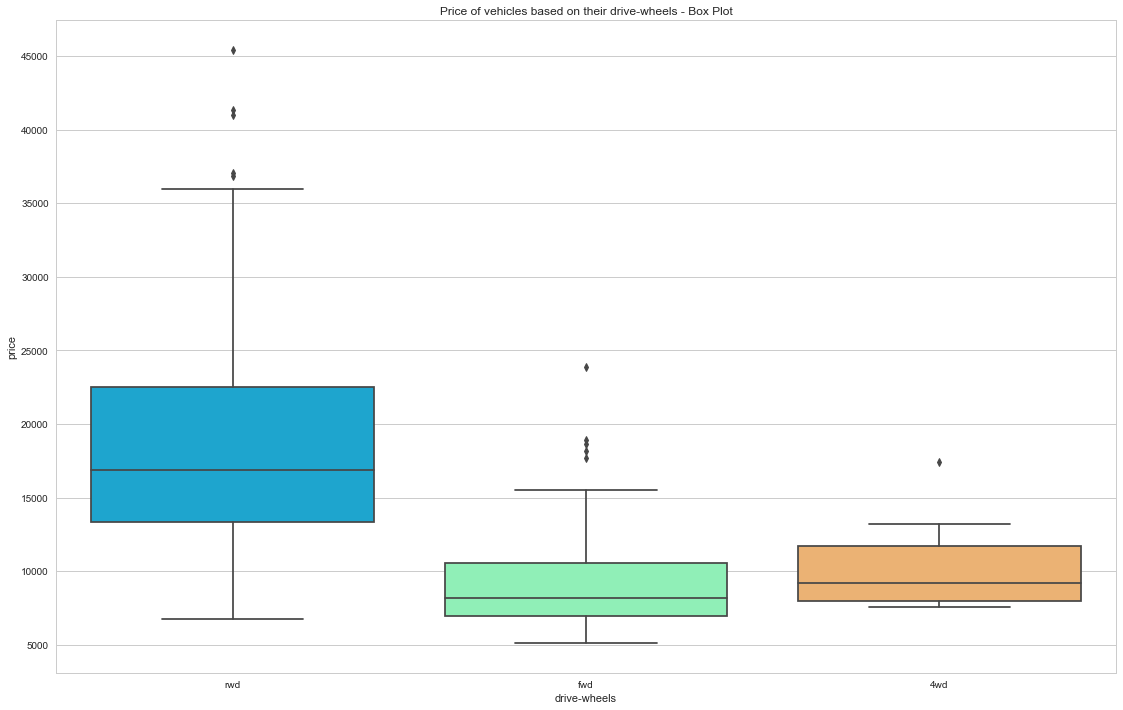

In [25]:
plt.figure(figsize=(19,12))
sbn.boxplot(data=df_auto,x='drive-wheels',y='price',palette='rainbow')
plt.title('Price of vehicles based on their drive-wheels - Box Plot')

### Make vs Symboling and Normalized-losses.
#### - Symboling value for all the Volvo vehicles is below -1.
#### - Symboling value of all saab make vehicles is between 2 to 3.
#### - Normalized-losses of 75% volvo vehicles are below 100.
#### - Normalized-losses of 50% toyota vehicles are below 90(Approximate).

Text(0.5, 1.0, 'Normalized-losses vs make - Box Plot')

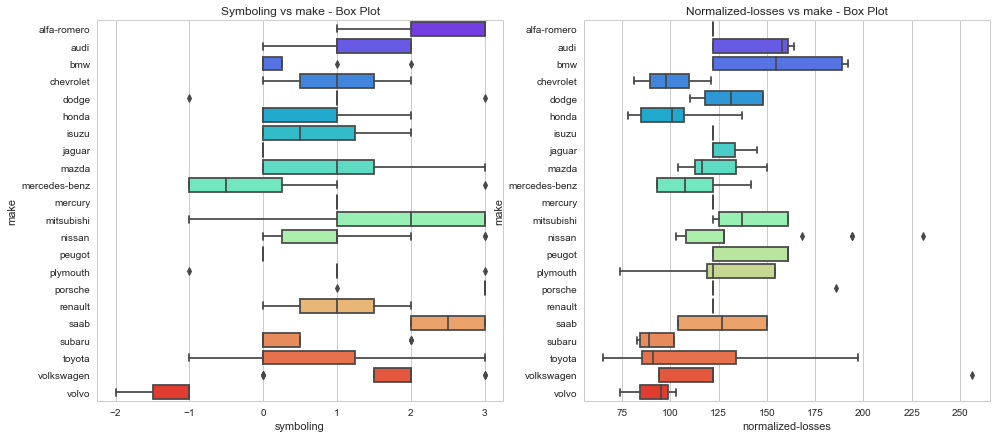

In [35]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sbn.boxplot(data=df_auto,x='symboling',y='make',palette='rainbow')
plt.title('Symboling vs make - Box Plot')
plt.subplot(1,2,2)
sbn.boxplot(data=df_auto,x='normalized-losses',y='make',palette='rainbow')
plt.title('Normalized-losses vs make - Box Plot')

Text(0.5, 1.0, 'Num-of-Cylinders vs Price - Box Plot')

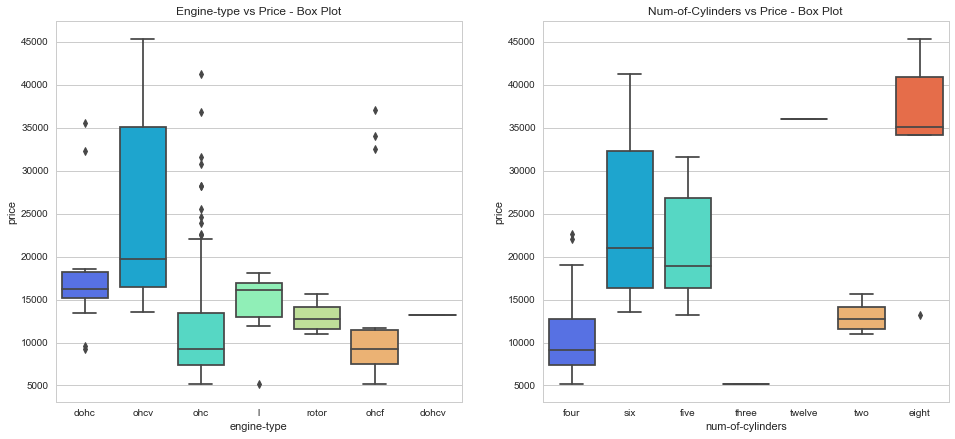

In [29]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sbn.boxplot(data=df_auto,x='engine-type',y='price',palette='rainbow')
plt.title('Engine-type vs Price - Box Plot')
plt.subplot(1,2,2)
sbn.boxplot(data=df_auto,x='num-of-cylinders',y='price',palette='rainbow')
plt.title('Num-of-Cylinders vs Price - Box Plot')

### Below box plot is representing the distribution of vehicle mileage data through the data quartiles (or percentiles) and mileage based on their body styles i.e. sedan, wagon, convertible, hardtop and hatchback.
#### - This box plot explains us that the vehiicles with body-style as 'convertible' has the less mileage than the other body-style vehicles, also it shows the hartop vehicles has more range (large distribution) of price than others
#### - Also it shows that the hatchback vehicles have the higher mileage than the other body-style vehicles, i.e. 50% of the hatchback vehicles gives mileage upto 28.
#### - Wagon vehicles are having the symboling between -1 and 0.
#### - Convertible vehicles are with the high symbolying/risk value.

Text(0.5, 1.0, 'Body-style vs symboling - Box Plot')

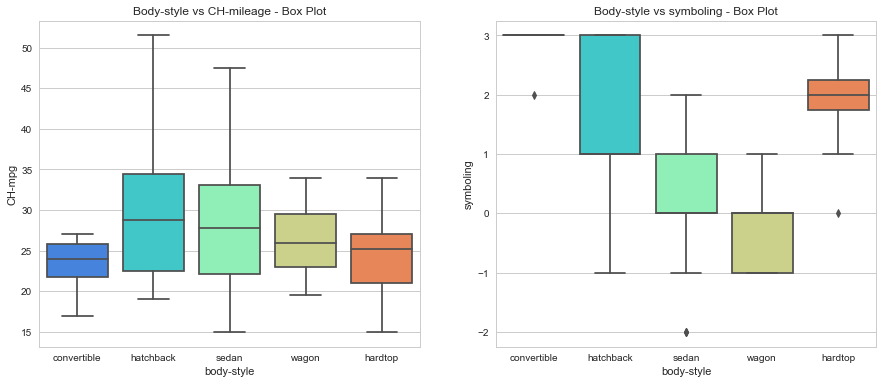

In [36]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sbn.boxplot(data=df_auto,x='body-style',y='CH-mpg',palette = 'rainbow')
plt.title('Body-style vs CH-mileage - Box Plot')

plt.subplot(1,2,2)
sbn.boxplot(data=df_auto,x='body-style',y='symboling',palette = 'rainbow')
plt.title('Body-style vs symboling - Box Plot')


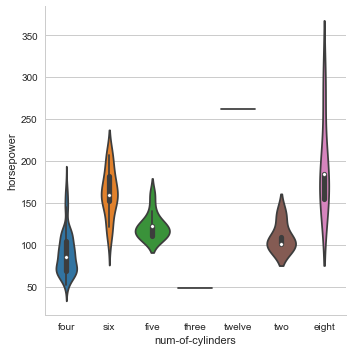

In [37]:
sbn.catplot(kind="violin", data=df_auto, x="num-of-cylinders", y="horsepower" )

### To have more deep dive, we can get the mileage of vehicles as per body style and 'Fuel-type'
#### - Hatchback diesel vehicles gives more mileage compared to other vehicles. 
#### - Hatchback diesel gives more milage mileage (42) copared to hatchback gas(29) vehicles.
#### - Convertibl gas and Hardtop diesel gives less mileage, which is approx 23.

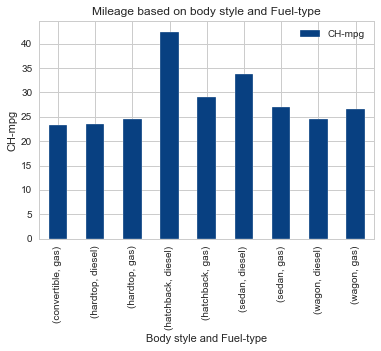

In [38]:
pd.pivot_table(df_auto,index=['body-style','fuel-type'], values='CH-mpg').plot(kind='bar',colormap = 'GnBu_r')
plt.title("Mileage based on body style and Fuel-type")
plt.ylabel('CH-mpg')
plt.xlabel('Body style and Fuel-type');

### Below bar chart shows which vehicle gives the better mileage based on drive-wheels.
#### - Get to know that the hardtop with fron wheel drive vehicles gives better mileage than the other vehicles.
#### - Front wheel drive vehicles gives better mileage than the rear wheel drive and four wheel drive vehicles.

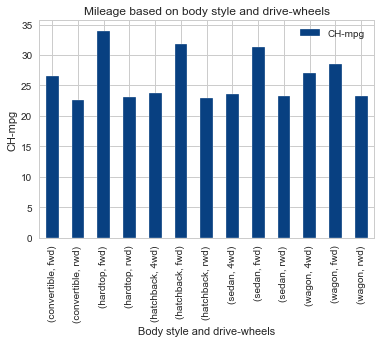

In [39]:
pd.pivot_table(df_auto,index=['body-style','drive-wheels'], values='CH-mpg').plot(kind='bar',colormap = 'GnBu_r')
plt.title("Mileage based on body style and drive-wheels")
plt.ylabel('CH-mpg')
plt.xlabel('Body style and drive-wheels');

Text(0.5, 1.0, 'Mileage of car based on drive-wheels')

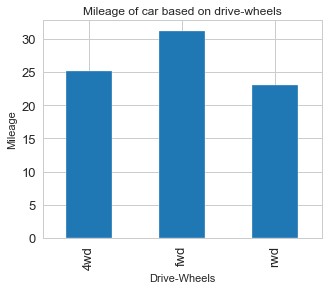

In [40]:
df_auto.groupby(['drive-wheels'])['CH-mpg'].mean().plot(kind = 'bar',figsize =(5,4), fontsize = 13)
plt.xlabel('Drive-Wheels')
plt.ylabel('Mileage')
plt.title('Mileage of car based on drive-wheels')

### Below bar chart shows symboling value based on body-style
#### - Wagon vehicles have the symboling range of -0.5 to 0.
#### - Convertible vehicles have the high symboling value which is more than 2.5.

Text(0.5, 1.0, 'Body-Style vs Symboling - Bar chart')

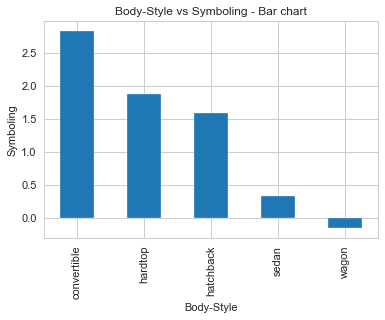

In [41]:
df_auto.groupby(['body-style'])['symboling'].mean().plot(kind = 'bar',fontsize = 11)
plt.xlabel('Body-Style', fontsize = 11)
plt.ylabel('Symboling', fontsize = 11) 
plt.title('Body-Style vs Symboling - Bar chart')

### Normalized losses based on body style and no. of doors

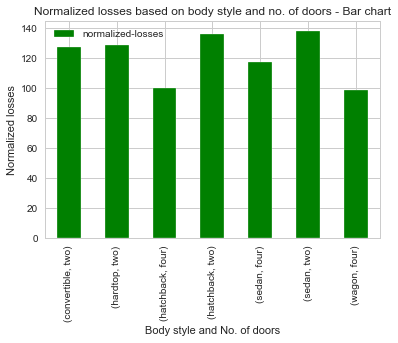

In [42]:
pd.pivot_table(df_auto,index=['body-style','num-of-doors'], values='normalized-losses').plot(kind='bar',color='green')
plt.title("Normalized losses based on body style and no. of doors - Bar chart")
plt.ylabel('Normalized losses')
plt.xlabel('Body style and No. of doors');

### Prices of vehicles based on Body-style and Fuel-type
#### - Hatchback diesel vehicles are the low priced vehicles, which is near about 7000 to 8000.
#### - Hardtop diesel vehicles are much more expensive, the price is approximately 27000.

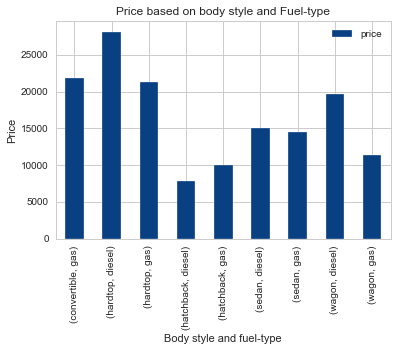

In [43]:
pd.pivot_table(df_auto,index=['body-style','fuel-type'], values='price').plot(kind='bar',colormap = 'GnBu_r')
plt.title("Price based on body style and Fuel-type")
plt.ylabel('Price')
plt.xlabel('Body style and fuel-type');

### Highest and lowest prices based on body-style and number of doors of vehicles.
#### - Hiatchback with four door vehicles are much low priced vehicles, price is aound 8000.
#### - Hardtop with two door and Convertible with two door vehicles are more expensive, prices are more than 21000.

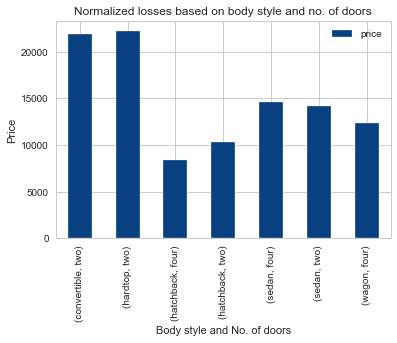

In [44]:
pd.pivot_table(df_auto,index=['body-style','num-of-doors'], values='price').plot(kind='bar',colormap = 'GnBu_r')
plt.title("Normalized losses based on body style and no. of doors")
plt.ylabel('Price')
plt.xlabel('Body style and No. of doors');

## Pandas post-profiling

In [45]:
#profile = df_auto.profile_report(title = "Automobile data after profiling")
#profile.to_file(output_file = "AutomobileProfiling.html")

In [46]:
df_auto.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,CH-mpg
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,24.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,24.0
